# Introduction to Data Science
## Assignment No.5
#### Kasra Ghorbani (810101489)
#### Mohammad Mahdi Samadi (810101465)


#### Task 2 :
Implement Multivariate recursion that uses gradient descent from scratch. 



Import the necessary python libraries and define create a class Multivariate recursion

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random

Learning rate : A hyperparameter for the recursion algorithm which we said to 0.001. To obtain better learning rates we need to test our model with different steps and choose the best one while taking into account the runtime and power overhead vs the accuracy of our prediction.

Iterations : Another hyperparameter used in the gradient descent part of the recursion algorithm alongside learning rate.We chose it's value to be 1000. More iterations will likely lead to more precise answers while also increasing the runtime of our code.

Weights : Weights refer to the coefficients assigned to the independent variables in order to predict the dependent variable.

Bias : The intercept of the regression line. Using line is incorrect since we have +10 independent variables.
This intercept represents the predicted value of the dependent variable when all independent variables are set to zero. 

In [20]:
class MultivariateLinearRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.mse_history = [] #used to display learning curve for different ys

    def fit(self, X, y):
        num_samples, num_features = X.shape

        self.weights = np.zeros(num_features)
        self.bias = 0
        self.mse_history     = []
        #Gradient descent
        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            mse = mean_squared_error(y, y_predicted)
            self.mse_history.append(mse) #used to graph learning curve

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias #a + bX1 + cX2 + ...


Read csv file and convert it into a pandas dataframe. Also create a range of random states and 2 lists to hold the MSE of our predictions in each random state (Used for graphing later on.)

In [21]:
df = pd.read_csv("cars.csv")
random_states = range(1, 10)
mse_Hp_list = []
mse_PinT_list = []

Now we want to loop over each random state and divide our data based on the random state.
Then we Normalize all of our X data so that they're on the same scale and also because the numbers exceed maximum integer limit in the gradient descent and MSE computation if not scaled.

Next we initialize our model with 1000 iterations and a learning step equal to 0.001 and fit our scaled train features alongside our train target variable 2 times once for "Horsepower" and once for "Price in thousands".
Aftwerwards our model receives a set of test features and it's prediction is returned and compared to the actual value to obtain the MSE. In the end the MSE is appended to a list of all MSEs for different random states. 

In [22]:

for state in random_states:
    train, test = train_test_split(df, test_size=0.1, random_state=state)

    #drop the columns dependent variables and keep the independents
    X_train= train.drop(['Price in Thousands', 'Horsepower'], axis=1)
    X_test= test.drop(['Price in Thousands', 'Horsepower'], axis=1)
    #select the "Horsepower" and "Price in thousands" columns as dependent variables
    y_test_PinT = test['Price in Thousands']
    y_train_PinT = train['Price in Thousands']
    y_test_Hp = test['Horsepower']
    y_train_Hp = train['Horsepower']
    #Normalize the data so that they're all on the same scale and 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = MultivariateLinearRegression(learning_rate=0.001, iterations=10000)

    model.fit(X_train_scaled, y_train_Hp)
    Hp_predictions = model.predict(X_test_scaled)
    mse_Hp = mean_squared_error(y_test_Hp, Hp_predictions)
    mse_Hp_list.append(mse_Hp)

    model.fit(X_train_scaled, y_train_PinT)
    PinT_predictions = model.predict(X_test_scaled)
    mse_PinT = mean_squared_error(y_test_PinT, PinT_predictions)
    mse_PinT_list.append(mse_PinT)


Display the MSE score for our predicted values for 'Horsepower' and 'Price in Thousands' on a graph for our range of random states.

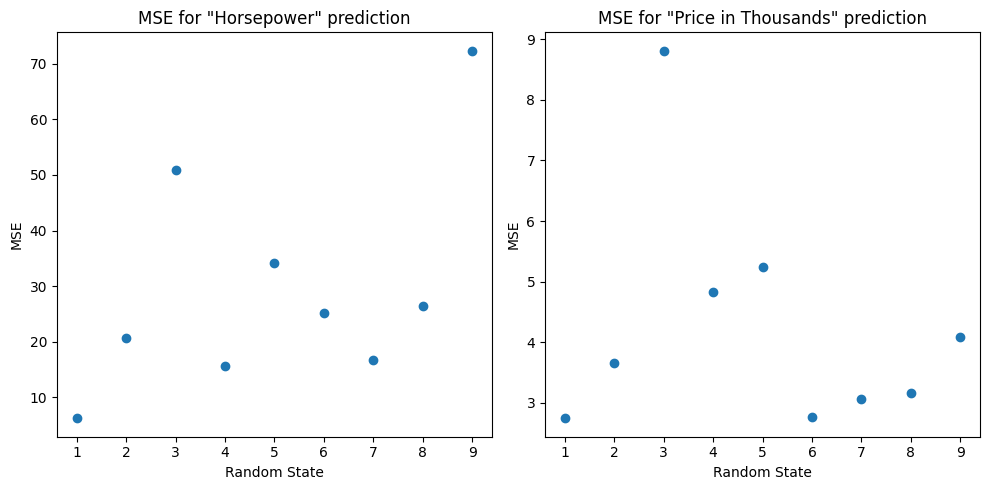

In [23]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(random_states, mse_Hp_list, marker='o')
plt.title('MSE for "Horsepower" prediction')
plt.xlabel('Random State')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.scatter(random_states, mse_PinT_list, marker='o')
plt.title('MSE for "Price in Thousands" prediction')
plt.xlabel('Random State')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

Below we'll display the learning curve showing the convergence our prediction in a random state for both of our target variables. as expected we are always getting closer to the correct value in each step however the growth rate becomes weaker with each iteration because our steps are getting smaller.

The field "mse_history calculates the MSE in each step we take" and by showing that our MSE is getting smaller we show that we are infact nearing the correct answer hence gradient descent is working correctly.

In [24]:
train, test = train_test_split(df, test_size=0.1, random_state=69)

X_train= train.drop(['Price in Thousands', 'Horsepower'], axis=1)
X_test= test.drop(['Price in Thousands', 'Horsepower'], axis=1)

y_test_PinT = test['Price in Thousands']
y_train_PinT = train['Price in Thousands']

y_test_Hp = test['Horsepower']
y_train_Hp = train['Horsepower']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_Hp = MultivariateLinearRegression(learning_rate=0.001, iterations=10000)
model_Hp.fit(X_train_scaled, y_train_Hp)
Hp_predictions = model_Hp.predict(X_test_scaled)

model_PinT = MultivariateLinearRegression(learning_rate=0.001, iterations=10000)
model_PinT.fit(X_train_scaled, y_train_PinT)
PinT_predictions = model_PinT.predict(X_test_scaled)


Display the learning curves :

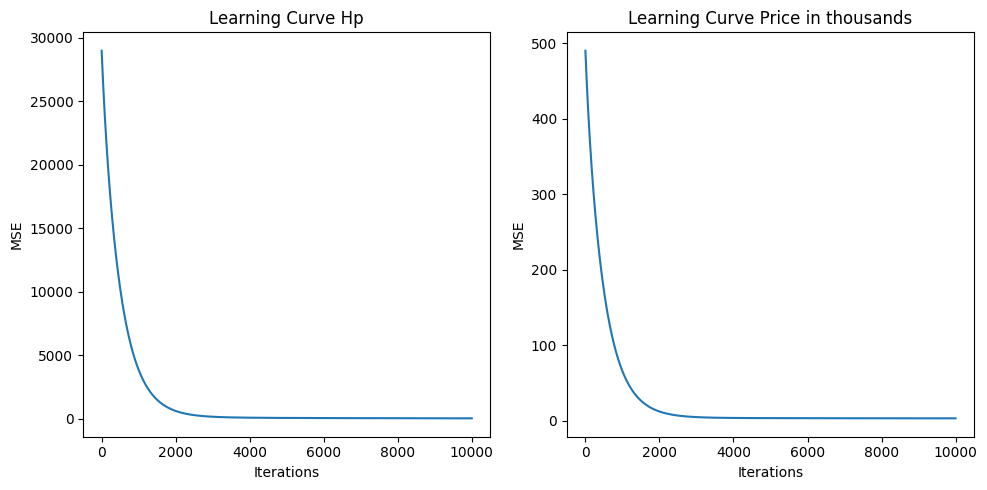

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(model_Hp.iterations), model_Hp.mse_history)
plt.title('Learning Curve Hp')
plt.xlabel('Iterations')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(range(model_PinT.iterations), model_PinT.mse_history)
plt.title('Learning Curve Price in thousands')
plt.xlabel('Iterations')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


##### K-Fold cross validation implementation : 
k-fold cross-validation is a technique used in machine learning to assess the performance of a model more reliably than simple train/test splitting. It helps in getting a more accurate estimate of the model's performance on unseen data.

1- Divide the data: The dataset is divided into k equally sized subsets or folds.

2- Iterate through the folds: For each iteration, one fold is used as the validation set (or test set) and the remaining k − 1 folds are used as the training set. This means that the model is trained k times, each time with a different fold held out for validation.

3- Train the model: The model is trained on the training set, which consists of k − 1 folds of the data.

4- Validate the model: The trained model is then validated on the held-out fold (the validation set) to compute a performance metric, such as accuracy, precision, recall, or mean squared error (MSE).

5- Aggregate the results: After iterating through all k folds, the performance metrics obtained from each fold are averaged to get a single performance estimate for the model.


In [26]:
from sklearn.metrics import r2_score

def k_fold_cross_validation(X, y, k):
    fold_size = len(X) // k
    mse_list = []
    r2_list = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i != k - 1 else None

        X_train = np.concatenate((X[:start], X[end:]))
        y_train = np.concatenate((y[:start], y[end:]))

        X_val = X[start:end]
        y_val = y[start:end]

        model = MultivariateLinearRegression(learning_rate=0.001, iterations=10000)
        model.fit(X_train, y_train)
        predictions = model.predict(X_val)

        mse = mean_squared_error(y_val, predictions)
        mse_list.append(mse)

        r2 = r2_score(y_val, predictions)
        r2_list.append(r2)

    return mse_list, r2_list


Similiar to the previous task we predict "Horsepower" and "Price in thousands". this time evaluating our result with K-Fold cross validation. We only do it on one random state unlike before however. 

In [28]:
X = df.drop(['Price in Thousands', 'Horsepower'], axis=1).values
y_Hp = df['Horsepower'].values
y_PinT = df['Price in Thousands'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mse_list_Hp, r2_list_Hp = k_fold_cross_validation(X_scaled, y_Hp, k=5)
mse_list_PinT, r2_list_PinT = k_fold_cross_validation(X_scaled, y_PinT, k=5)

print("Custom K-Folds cross validation MSE for Horsepower prediction :", np.mean(mse_list_Hp))
print("Custom K-Folds cross validation MSE for Price in thousands prediction :", np.mean(mse_list_PinT))
print("Custom K-Folds cross validation R2 for Horsepower prediction :", np.mean(r2_list_Hp))
print("Custom K-Folds cross validation R2 for Price in thousands prediction :", np.mean(r2_list_PinT))

Custom K-Folds cross validation MSE for Horsepower prediction : 35.13212187846077
Custom K-Folds cross validation MSE for Price in thousands prediction : 5.285430998071848
Custom K-Folds cross validation R2 for Horsepower prediction : 0.9768498845469941
Custom K-Folds cross validation R2 for Price in thousands prediction : 0.8657528371956472


##### Task 4
Compare the results with results from built-in python libraries

In [30]:
X = df.drop(['Price in Thousands', 'Horsepower'], axis=1)
y_Hp = df['Horsepower']
y_PinT = df['Price in Thousands']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train_Hp, y_test_Hp = train_test_split(X_scaled, y_Hp, test_size=0.1, random_state=69)
X_train, X_test, y_train_PinT, y_test_PinT = train_test_split(X_scaled, y_PinT, test_size=0.1, random_state=69)

model_Hp = LinearRegression()
model_PinT = LinearRegression()

model_Hp.fit(X_train, y_train_Hp)
model_PinT.fit(X_train, y_train_PinT)

Hp_predictions = model_Hp.predict(X_test)
PinT_predictions = model_PinT.predict(X_test)

mse_Hp = mean_squared_error(y_test_Hp, Hp_predictions)
mse_PinT = mean_squared_error(y_test_PinT, PinT_predictions)
r2_Hp = r2_score(y_test_Hp, Hp_predictions)
r2_PinT = r2_score(y_test_PinT, PinT_predictions)
print('MSE for "Horsepower" prediction with built-in linear regression:', mse_Hp)
print('MSE for "Price in Thousands" prediction with built-in linear regression:', mse_PinT)
print('R2 for "Horsepower" prediction with built-in linear regression:', r2_Hp)
print('R2 for "Horsepower" prediction with built-in linear regression:', r2_PinT)


# Kfold
#the negative sign is used because cross_val_score by default calculates
# a score where higher is better. This works well for metrics like
# accuracy, precision, recall, etc., where a higher
# score indicates better performance.
#However, for loss functions like Mean Squared Error (MSE),
# lower values are better. To make MSE compatible with the 
# cross_val_score function’s convention of “higher is better”,
# sklearn returns the negative of the MSE. This is why the scoring
# parameter is set to 'neg_mean_squared_error'.
mse_list_Hp = - cross_val_score(model_Hp, X_scaled, y_Hp, cv=5, scoring='neg_mean_squared_error')
mse_list_PinT = - cross_val_score(model_PinT, X_scaled, y_PinT, cv=5, scoring='neg_mean_squared_error')
r2_list_PinT = cross_val_score(model_PinT, X_scaled, y_PinT, cv=5, scoring='r2')
r2_list_PinT = cross_val_score(model_PinT, X_scaled, y_PinT, cv=5, scoring='r2')


print('MSE for "Horsepower" prediction using built-in K-Folds cross validation:', np.mean(mse_list_Hp))
print('MSE for "Price in Thousands" prediction using built-in K-Folds cross validation:', np.mean(mse_list_PinT))
print('R2 for "Horsepower" prediction using built-in K-Folds cross validation:', np.mean(r2_list_Hp))
print('R2 for "Price in Thousands" prediction using built-in K-Folds cross validation:', np.mean(r2_list_PinT))




MSE for "Horsepower" prediction with built-in linear regression: 3.5480626703703195
MSE for "Price in Thousands" prediction with built-in linear regression: 2.982819350654027
R2 for "Horsepower" prediction with built-in linear regression: 0.9973826818403743
R2 for "Horsepower" prediction with built-in linear regression: 0.924732636336749
MSE for "Horsepower" prediction using built-in K-Folds cross validation: 6.0848046002524665
MSE for "Price in Thousands" prediction using built-in K-Folds cross validation: 5.115431908387444
R2 for "Horsepower" prediction using built-in K-Folds cross validation: 0.9768498845469941
R2 for "Price in Thousands" prediction using built-in K-Folds cross validation: 0.8731519641485164


## Q4
### Advantages of K-Fold Cross-Validation:

More Reliable Estimate of Out-of-Sample Performance: K-Fold cross-validation gives a more ‘robust’ estimate of the model’s performance on unseen data compared to train/test split.

Reduced Variance: By using most of the data for training, k-fold cross-validation reduces the variance of the model’s performance estimate, leading to more reliable results.

Efficient Use of Data: Each observation in the data sample is used for both training and validation, maximizing the use of available data.

### Disadvantages of K-Fold Cross-Validation:

Computationally Expensive: K-Fold cross-validation requires the model to be trained k times which can be computationally expensive for large datasets or complex models.

Not Suitable for Time Series: If you have a time-dependent data, k-fold cross-validation can destroy the time-dependent structure.

### To address these limitations, other types of cross-validation methods can be used:

Stratified K-Fold Cross-Validation: This variation of k-fold cross-validation is used for imbalanced datasets, where the distribution of classes is preserved in each fold to ensure that one class of data is not overrepresented.

Leave-One-Out Cross-Validation (LOOCV): In this type, k is set to the total number of observations in the dataset. This means that each observation is used as the validation set exactly once. It’s computationally expensive but provides a less biased estimate of the model performance.

Time Series Cross-Validation: This is a variation that can be used for time-series data. The train/test split is done in a way to respect the temporal order of observations.

Group K-Fold Cross-Validation: This is a variation that ensures the same group is not represented in both testing and training sets. Particularly useful when there are groups/segments in data.

## Q5
We mostly used the MSE. Other evaluation functions we know of are RSS, RMSE, R2, MAE, out of which most are relient on MSE, RMSE being the root of MSE, RSS beaing MSE * n and MAE being the mean of the absolute value of residuals instead of squared which is less sensitive to outliers. We also used the R2 score for the linear regression model and Kfolds which essentialy shows what percent of our datas variance can be explained by our regression model. values closer to 1 are better while values closer to 0 are worse